### Практична робота 4 

# Глибокий аналіз і візуалізація даних  

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1. Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки. 

In [2]:
df = pd.read_csv("museum_visitors.csv")

2. Вивести перші 5 рядків датасету. 

In [3]:
df.head(5)

,Date,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129
3,2014-04-01,26989,6756,2129,2824
4,2014-05-01,36883,10858,3676,10694


3. Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків). 

In [4]:
print(f"Датасет містить {df.shape[0]} рядків та {df.shape[1]} стовпців")

Датасет містить 59 рядків та 5 стовпців


In [5]:
df.dtypes

Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object

In [6]:
# перетворила тип колонки Date у datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                                    datetime64[ns]
Avila Adobe                                      int64
Firehouse Museum                                 int64
Chinese American Museum                          int64
America Tropical Interpretive Center             int64
dtype: object

In [7]:
df.isna().sum()

Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64

> немає пустих значень

4. Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів). 

In [8]:
df.duplicated().sum()

0

> немає дублікатів

5. Про які роки містить інформацію датасет.  

In [9]:
unique_years = df['Date'].dt.year.unique()
print(unique_years)

[2014 2015 2016 2017 2018]


6. Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center). 

In [10]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum',
       'america_tropical_interpretive_center'],
      dtype='object')

7. Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду. 

In [11]:
average_visitors_avila = round(df['avila_adobe'].mean())
average_visitors_firehouse = round(df['firehouse_museum'].mean())
average_visitors_chinese = round(df['chinese_american_museum'].mean())
average_visitors_america = round(df['america_tropical_interpretive_center'].mean())

print("Середня кількість відвідувачів для Avila Adobe:", average_visitors_avila)
print("Середня кількість відвідувачів для Firehouse Museum:", average_visitors_firehouse)
print("Середня кількість відвідувачів для Chinese American Museum:", average_visitors_chinese)
print("Середня кількість відвідувачів для America Tropical Interpretive Center:", average_visitors_america)

Середня кількість відвідувачів для Avila Adobe: 24062
Середня кількість відвідувачів для Firehouse Museum: 6473
Середня кількість відвідувачів для Chinese American Museum: 2721
Середня кількість відвідувачів для America Tropical Interpretive Center: 7107


In [12]:
# вирішила переробити це завдання і робити наступні із використанням циклу
museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

In [13]:
for museum in museums:
    average_visitors = round(df[museum].mean())
    print(f"Середня кількість відвідувачів для {museum}: {average_visitors}")
    print()

Середня кількість відвідувачів для avila_adobe: 24062

Середня кількість відвідувачів для firehouse_museum: 6473

Середня кількість відвідувачів для chinese_american_museum: 2721

Середня кількість відвідувачів для america_tropical_interpretive_center: 7107



8. Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік 

In [14]:
data_2018 = df[df['date'].dt.year == 2018]
data_2018.head(3)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
48,2018-01-01,16265,3910,2477,5837
49,2018-02-01,14718,3306,2710,5705
50,2018-03-01,19001,5225,4529,4909


In [15]:
for museum in museums:
    min_visitors = data_2018[museum].min()
    max_visitors = data_2018[museum].max()
    
    print(f"Мінімальна кількість відвідувачів для {museum} в 2018 році: {min_visitors}")
    print(f"Максимальна кількість відвідувачів для {museum} в 2018 році: {max_visitors}")
    print()

Мінімальна кількість відвідувачів для avila_adobe в 2018 році: 14718
Максимальна кількість відвідувачів для avila_adobe в 2018 році: 25173

Мінімальна кількість відвідувачів для firehouse_museum в 2018 році: 3306
Максимальна кількість відвідувачів для firehouse_museum в 2018 році: 8013

Мінімальна кількість відвідувачів для chinese_american_museum в 2018 році: 2146
Максимальна кількість відвідувачів для chinese_american_museum в 2018 році: 4960

Мінімальна кількість відвідувачів для america_tropical_interpretive_center в 2018 році: 3180
Максимальна кількість відвідувачів для america_tropical_interpretive_center в 2018 році: 5837



9. Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри). 

In [16]:
data_2015 = df[df['date'].dt.year == 2015]
data_2015.head(3)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
12,2015-01-01,20438,3858,1823,6250
13,2015-02-01,15578,3742,1558,5907
14,2015-03-01,21297,5390,2336,9884


In [17]:
# додала колонку із назвою місяця
data_2015['month'] = data_2015['date'].dt.strftime('%B')
data_2015.head()

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center,month
12,2015-01-01,20438,3858,1823,6250,January
13,2015-02-01,15578,3742,1558,5907,February
14,2015-03-01,21297,5390,2336,9884,March
15,2015-04-01,26670,7000,3057,7254,April
16,2015-05-01,34383,12528,4009,13207,May


In [18]:
for museum in museums:
    monthly_visitors = data_2015.groupby('month')[museum].sum()
    month_max = monthly_visitors.idxmax()
    month_min = monthly_visitors.idxmin()

    print(f"Музей: {museum.upper()}")
    print(f"Місяць з найвищою загальною кількістю відвідувачів в 2015 році: {month_max}")
    print(f"Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: {month_min}")
    print()

Музей: AVILA_ADOBE
Місяць з найвищою загальною кількістю відвідувачів в 2015 році: July
Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: February

Музей: FIREHOUSE_MUSEUM
Місяць з найвищою загальною кількістю відвідувачів в 2015 році: May
Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: February

Музей: CHINESE_AMERICAN_MUSEUM
Місяць з найвищою загальною кількістю відвідувачів в 2015 році: May
Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: September

Музей: AMERICA_TROPICAL_INTERPRETIVE_CENTER
Місяць з найвищою загальною кількістю відвідувачів в 2015 році: May
Місяць з найнижчою загальною кількістю відвідувачів в 2015 році: February



10. Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року 

In [19]:
# просто подивилася
data_2018.date.unique()

array(['2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [20]:
summer_2018 = data_2018[df['date'].dt.month.isin([6, 7, 8])]
winter_2018 = data_2018[df['date'].dt.month.isin([12, 1, 2])]

display(summer_2018.head(), winter_2018.head())

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
53,2018-06-01,22171,4635,2518,4694
54,2018-07-01,23136,4191,2620,4718
55,2018-08-01,20815,4866,2409,3891


,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
48,2018-01-01,16265,3910,2477,5837
49,2018-02-01,14718,3306,2710,5705


In [21]:
summer_visitors_avila = summer_2018['avila_adobe'].sum()
winter_visitors_avila = winter_2018['avila_adobe'].sum()

print("Кількість відвідувачів музею 'Avila Adobe' у літні місяці (2018 рік):", summer_visitors_avila)
print("Кількість відвідувачів музею 'Avila Adobe' у зимові місяці (2018 рік):", winter_visitors_avila)

Кількість відвідувачів музею 'Avila Adobe' у літні місяці (2018 рік): 66122
Кількість відвідувачів музею 'Avila Adobe' у зимові місяці (2018 рік): 30983


> Висновок: у зимові місяці маємо більш ніж вдвічі менше відвідувачів, але при умові, що у нас немає даних за 12 місяць(грудень)

11. Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [22]:
data_2016 = df[df['date'].dt.year == 2016]
data_2016['month'] = data_2016['date'].dt.month # обрала місяць свідомо, адже немає сенсу досліджувати кореляцію за певною конкретною датою
# тим більше, що використовуючи dt.day, воно потім сгрупує однакові числа(дні)

In [23]:
correlations = {}

for museum in museums:
    correlation = data_2016['month'].corr(data_2016[museum])  # використала метод саме до місяця, адже інакше була б кореляція між музеями
    correlations[museum] = correlation

for museum, correlation in correlations.items():
    print(f"Кореляція між місяцем і кількістю відвідувачів у музеї {museum}: {correlation}")
    print()

Кореляція між місяцем і кількістю відвідувачів у музеї avila_adobe: 0.0633963656768862

Кореляція між місяцем і кількістю відвідувачів у музеї firehouse_museum: -0.19852239598191213

Кореляція між місяцем і кількістю відвідувачів у музеї chinese_american_museum: -0.41235044983078223

Кореляція між місяцем і кількістю відвідувачів у музеї america_tropical_interpretive_center: -0.22593545295356723



> Висновки: Можемо спостерігати, що залежність між місяцем і кількістю відвідувачів є лише в музеї "Avila Adobe"

In [24]:
corr_matrix = data_2016[museums].corr()
corr_matrix

,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
avila_adobe,1.000000,0.737200,0.089054,0.436561
firehouse_museum,0.737200,1.000000,0.553935,0.247389
chinese_american_museum,0.089054,0.553935,1.000000,0.443800
america_tropical_interpretive_center,0.436561,0.247389,0.443800,1.000000


> З таким варіантом виходить кореляція між музеями, але якщо чесно, я не розумію, що нам дає ця інформація. Про кореляцію дати-музея розумію, про музей-музей – ні. Але раз треба, то зробила)

##### Візуалізація даних 

12. Побудувати теплокарту кореляції для попереднього завдання. 

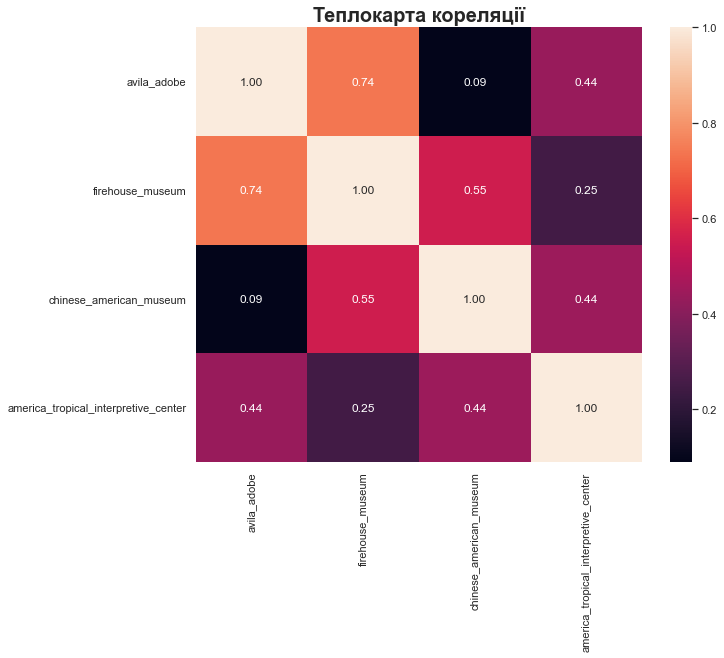

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Теплокарта кореляції', fontsize=20, fontweight="bold")
plt.show()

13. Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року. 

In [26]:
data_2017 = df[df['date'].dt.year == 2017]
data_2017.head(3)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
36,2017-01-01,18792,3551,2531,4929
37,2017-02-01,14035,3491,2139,4493
38,2017-03-01,20680,5273,5966,6271


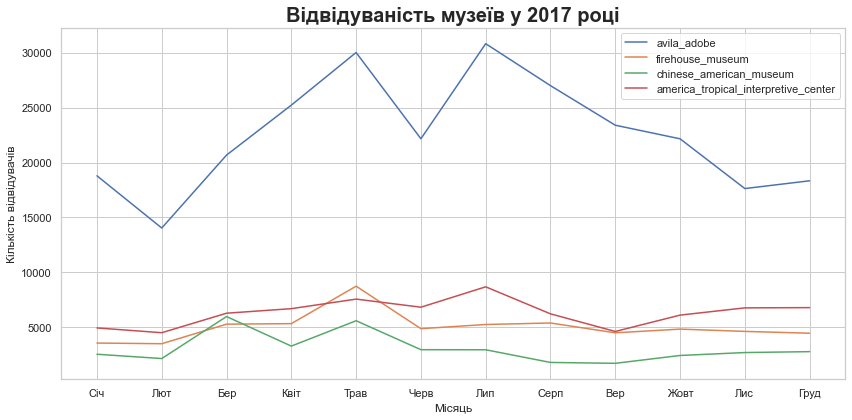

In [27]:
plt.figure(figsize=(12, 6))

for museum in museums:
    plt.plot(data_2017['date'].dt.month, data_2017[museum], label=museum)

plt.title('Відвідуваність музеїв у 2017 році', fontsize=20, fontweight="bold")
plt.xlabel('Місяць')
months = ['Січ', 'Лют', 'Бер', 'Квіт', 'Трав', 'Черв', 'Лип', 'Серп', 'Вер', 'Жовт', 'Лис', 'Груд']
plt.xticks(range(1, 13), months)
plt.ylabel('Кількість відвідувачів')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

> Висновок: в топі за відвідуваністю у нас музей Avila Adobe. Найменша кількість відвідувань у Chinese American Museum. 
Щодо місяців, простежується підняття весною, особливо у Травні, і в Липні. Це може бути пов'язано з тим, що багато людей відвідують музеї під час весняних та літніх канікул. Осінь та зима, зазвичай, більш прохолодні і менш популярні для відвідування музеїв через погодні умови і святкові сезони.

14. Побудувати графіки розсіювання для кожного музею за 2018 рік 

<Figure size 1080x864 with 0 Axes>

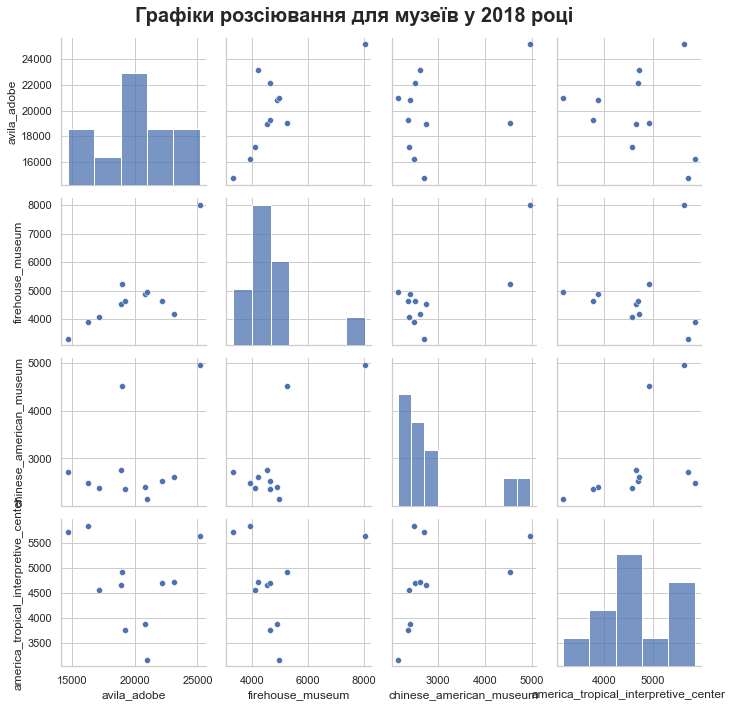

In [28]:
plt.figure(figsize=(15, 12))

sns.pairplot(data = data_2018, vars = museums);
plt.suptitle('Графіки розсіювання для музеїв у 2018 році', fontsize=20, fontweight="bold")
plt.tight_layout()
plt.show()

15. Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий. 

In [29]:
# для 2014 ще немає допоміжного датасету
data_2014 = df[df['date'].dt.year == 2014]
data_2014.head(3)

,date,avila_adobe,firehouse_museum,chinese_american_museum,america_tropical_interpretive_center
0,2014-01-01,24778,4486,1581,6602
1,2014-02-01,18976,4172,1785,5029
2,2014-03-01,25231,7082,3229,8129


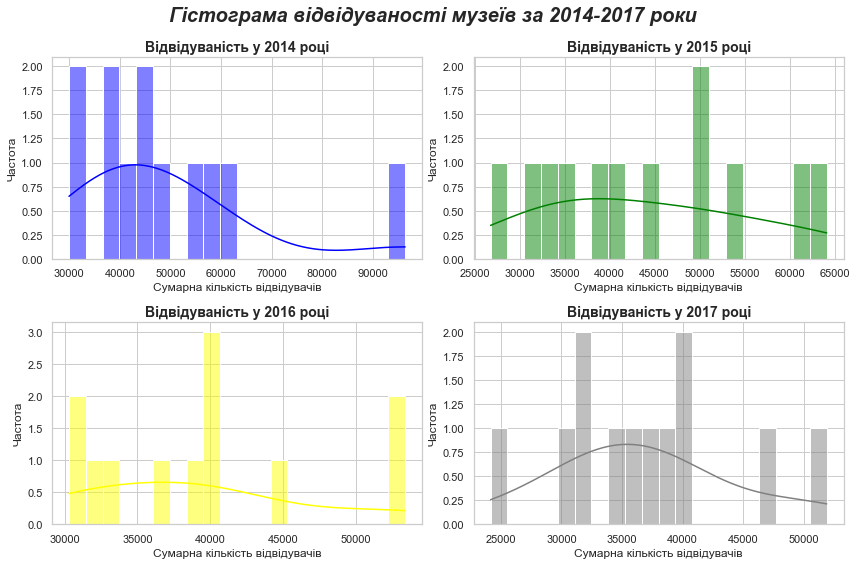

In [30]:
fig, axes = plt.subplots(2, 2, figsize = (12, 8))

colors =['blue', 'green', 'yellow', 'gray']

for i, year_data in enumerate([data_2014, data_2015, data_2016, data_2017]):
    total_visitors = year_data[museums].sum(axis = 1)
    ax = axes[i // 2, i % 2]
    sns.histplot(data = total_visitors, 
                 bins = 20, 
                 kde = True, 
                 ax = ax, 
                 color = colors[i])

    ax.set_title(f'Відвідуваність у {2014 + i} році', fontsize=14, fontweight="bold")
    ax.set_xlabel('Сумарна кількість відвідувачів')
    ax.set_ylabel('Частота')

plt.suptitle("Гістограма відвідуваності музеїв за 2014-2017 роки", fontsize=20, fontweight="bold", style='italic')
plt.tight_layout()
plt.show()